In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import logging 

logging.basicConfig(
  format = '%(asctime)s %(message)s',
  level=logging.INFO,
  datefmt='%Y-%m-%d %H:%M:%S'
)

In [3]:
import pandas as pd

CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
promoters_filename = f'{CONSTRAINT_TOOLS}/download-process-data/promoters/promoters.grch38.test.csv'
promoters = pd.read_csv(promoters_filename, sep=',')
promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped
0,ENST00000290573,ENSG00000159399,HK2,0.676779,0.441,0.266410,0.180275,0.859181,chr2:74831982-74835980,3999,chr2:74833482-74834480
1,ENST00000310842,ENSG00000146707,POMZP3,0.701537,1.374,0.699820,0.332475,0.615007,chr7:76625243-76629241,3999,chr7:76626743-76627741
2,ENST00000319242,ENSG00000125861,GFRA4,0.288711,1.162,0.451030,0.022775,0.502667,chr20:3661401-3665399,3999,chr20:3662901-3663899
3,ENST00000267938,ENSG00000140367,UBE2Q2,0.722779,0.966,0.627350,0.163125,0.978042,chr15:75841286-75845284,3999,chr15:75842786-75843784
4,ENST00000262395,ENSG00000076604,TRAF4,0.508573,0.354,0.136830,0.220575,0.886072,chr17:28741985-28745983,3999,chr17:28743485-28744483
...,...,...,...,...,...,...,...,...,...,...,...
2206,ENST00000372759,ENSG00000084073,ZMPSTE24,0.568011,1.304,0.927040,0.106575,0.936765,chr1:40256108-40260106,3999,chr1:40257608-40258606
2207,ENST00000352732,ENSG00000140526,ABHD2,0.443643,0.424,0.185250,0.149700,0.930817,chr15:89086151-89090149,3999,chr15:89087651-89088649
2208,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.847400,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722
2209,ENST00000300179,ENSG00000166924,NYAP1,0.513642,0.196,0.041307,0.297275,0.821822,chr7:100481928-100485926,3999,chr7:100483428-100484426


In [4]:
import sys
sys.path.append('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/utilities')

from pack_unpack import unpack
import pyranges as pr

def add_chromosome_start_end(row): 
    region = row['region_grch38'] 
    row['Chromosome'], row['Start'], row['End'] = unpack(region)
    return row

promoters = promoters.apply(add_chromosome_start_end, axis=1)
promoters = pr.PyRanges(promoters)
promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471
1,ENST00000349533,ENSG00000116678,LEPR,0.562905,0.282,0.16182,0.034375,0.643277,chr1:65418653-65422651,3999,chr1:65420153-65421151,chr1,65418653,65422651
2,ENST00000366577,ENSG00000116984,MTR,0.686405,0.582,0.42443,0.055250,0.859294,chr1:236793311-236797309,3999,chr1:236794811-236795809,chr1,236793311,236797309
3,ENST00000376132,ENSG00000204495,PRAMEF13,0.195202,1.892,0.00000,NaN,0.078596,chr1:13345136-13349134,3999,chr1:13346636-13347634,chr1,13345136,13349134
4,ENST00000375847,ENSG00000116138,DNAJC16,0.664360,0.788,0.56008,0.140700,0.855939,chr1:15524814-15528812,3999,chr1:15526314-15527312,chr1,15524814,15528812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,ENST00000248958,ENSG00000128228,SDF2L1,0.565301,1.025,0.32604,0.167800,0.878299,chr22:21640262-21644260,3999,chr22:21641762-21642760,chr22,21640262,21644260
2207,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.90573,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876
2208,ENST00000252934,ENSG00000130638,ATXN10,0.530941,0.682,0.40228,0.055050,0.765541,chr22:45669800-45673798,3999,chr22:45671300-45672298,chr22,45669800,45673798
2209,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.84740,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722,chr22,17006224,17010222


In [5]:

# neutral regions that overlap train AND test promoters: 
neutral_regions = pr.read_bed('/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/work-train-germline-model/neutral-regions.filtered.bed')

neutral_regions

,Chromosome,Start,End
0,chr1,14653,14905
1,chr1,15354,15772
2,chr1,16125,16607
3,chr1,17055,17171
4,chr1,17436,17606
...,...,...,...
1649454,chr22,50794754,50796286
1649455,chr22,50796386,50796692
1649456,chr22,50796780,50796942
1649457,chr22,50797586,50797812


In [6]:
promoters.promoter_id = promoters.df.index.values

promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0
1,ENST00000349533,ENSG00000116678,LEPR,0.562905,0.282,0.16182,0.034375,0.643277,chr1:65418653-65422651,3999,chr1:65420153-65421151,chr1,65418653,65422651,1
2,ENST00000366577,ENSG00000116984,MTR,0.686405,0.582,0.42443,0.055250,0.859294,chr1:236793311-236797309,3999,chr1:236794811-236795809,chr1,236793311,236797309,2
3,ENST00000376132,ENSG00000204495,PRAMEF13,0.195202,1.892,0.00000,NaN,0.078596,chr1:13345136-13349134,3999,chr1:13346636-13347634,chr1,13345136,13349134,3
4,ENST00000375847,ENSG00000116138,DNAJC16,0.664360,0.788,0.56008,0.140700,0.855939,chr1:15524814-15528812,3999,chr1:15526314-15527312,chr1,15524814,15528812,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,ENST00000248958,ENSG00000128228,SDF2L1,0.565301,1.025,0.32604,0.167800,0.878299,chr22:21640262-21644260,3999,chr22:21641762-21642760,chr22,21640262,21644260,2206
2207,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.90573,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207
2208,ENST00000252934,ENSG00000130638,ATXN10,0.530941,0.682,0.40228,0.055050,0.765541,chr22:45669800-45673798,3999,chr22:45671300-45672298,chr22,45669800,45673798,2208
2209,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.84740,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722,chr22,17006224,17010222,2209


In [7]:
# https://pyranges.readthedocs.io/en/latest/autoapi/pyranges/pyranges/index.html?highlight=intersect#pyranges.pyranges.PyRanges.overlap

promoters_that_overlap_neutral_regions = promoters.overlap(neutral_regions).df
promoters_that_overlap_neutral_regions

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.779360,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0
1,ENST00000349533,ENSG00000116678,LEPR,0.562905,0.282,0.161820,0.034375,0.643277,chr1:65418653-65422651,3999,chr1:65420153-65421151,chr1,65418653,65422651,1
2,ENST00000366577,ENSG00000116984,MTR,0.686405,0.582,0.424430,0.055250,0.859294,chr1:236793311-236797309,3999,chr1:236794811-236795809,chr1,236793311,236797309,2
3,ENST00000376132,ENSG00000204495,PRAMEF13,0.195202,1.892,0.000000,NaN,0.078596,chr1:13345136-13349134,3999,chr1:13346636-13347634,chr1,13345136,13349134,3
4,ENST00000375847,ENSG00000116138,DNAJC16,0.664360,0.788,0.560080,0.140700,0.855939,chr1:15524814-15528812,3999,chr1:15526314-15527312,chr1,15524814,15528812,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,ENST00000266088,ENSG00000100170,SLC5A1,0.177320,0.746,0.497440,0.091225,0.830670,chr22:32041033-32045031,3999,chr22:32042533-32043531,chr22,32041033,32045031,2204
2193,ENST00000266269,ENSG00000100105,PATZ1,0.736377,0.238,0.050275,0.560725,0.952861,chr22:31344234-31348232,3999,chr22:31345734-31346732,chr22,31344234,31348232,2205
2194,ENST00000248958,ENSG00000128228,SDF2L1,0.565301,1.025,0.326040,0.167800,0.878299,chr22:21640262-21644260,3999,chr22:21641762-21642760,chr22,21640262,21644260,2206
2195,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.905730,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207


In [8]:
# https://pyranges.readthedocs.io/en/latest/autoapi/pyranges/pyranges/index.html?highlight=intersect#pyranges.pyranges.PyRanges.intersect

neutral_regions_within_promoters = promoters.intersect(neutral_regions).df[['Start', 'End', 'promoter_id']]
neutral_regions_within_promoters


,Start,End,promoter_id
0,5990473,5990927,0
1,5991043,5991269,0
2,5991556,5991892,0
3,5992015,5992244,0
4,5992788,5993026,0
...,...,...,...
9757,26482873,26483674,2207
9758,26484099,26485876,2207
9759,17006224,17007555,2209
9760,17007556,17007914,2209


In [9]:
promoters_with_neutral_regions = pd.merge(
  promoters_that_overlap_neutral_regions, 
  neutral_regions_within_promoters,
  on='promoter_id', 
  how='inner'
)
promoters_with_neutral_regions = promoters_with_neutral_regions.rename(columns={
  "Start_x": "Start_promoter", 
  "End_x": "End_promoter",
  "Start_y": "Start_neutral_part", 
  "End_y": "End_neutral_part",
})
promoters_with_neutral_regions


,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start_promoter,End_promoter,promoter_id,Start_neutral_part,End_neutral_part
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5990473,5990927
1,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5991043,5991269
2,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5991556,5991892
3,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5992015,5992244
4,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5992788,5993026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.90573,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207,26482873,26483674
9758,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.90573,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207,26484099,26485876
9759,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.84740,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722,chr22,17006224,17010222,2209,17006224,17007555
9760,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.84740,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722,chr22,17006224,17010222,2209,17007556,17007914


In [10]:
def compute_neutral_part_length(row):
    return row['End_neutral_part'] - row['Start_neutral_part']

promoters_with_neutral_regions['neutral_part_length'] = promoters_with_neutral_regions.apply(compute_neutral_part_length, axis=1)
promoters_with_neutral_regions

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start_promoter,End_promoter,promoter_id,Start_neutral_part,End_neutral_part,neutral_part_length
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5990473,5990927,454
1,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5991043,5991269,226
2,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5991556,5991892,336
3,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5992015,5992244,229
4,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.77936,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,5992788,5993026,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9757,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.90573,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207,26482873,26483674,801
9758,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.90573,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207,26484099,26485876,1777
9759,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.84740,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722,chr22,17006224,17010222,2209,17006224,17007555,1331
9760,ENST00000400588,ENSG00000215568,GAB4,0.391349,1.271,0.84740,0.132850,0.835215,chr22:17006224-17010222,3999,chr22:17007724-17008722,chr22,17006224,17010222,2209,17007556,17007914,358


In [11]:
promoters_with_neutral_regions = promoters_with_neutral_regions[['promoter_id', 'neutral_part_length']]
promoters_with_neutral_regions 


,promoter_id,neutral_part_length
0,0,454
1,0,226
2,0,336
3,0,229
4,0,238
...,...,...
9757,2207,801
9758,2207,1777
9759,2209,1331
9760,2209,358


In [12]:
grouped_neutral_regions = promoters_with_neutral_regions.groupby('promoter_id')

number_neutral_bases = grouped_neutral_regions['neutral_part_length'].sum().rename("number_neutral_bases")
number_neutral_bases

promoter_id
0       2811
1       3395
2       3494
3       3608
4       3060
        ... 
2204    3841
2205     203
2206    2243
2207    3084
2209    3689
Name: number_neutral_bases, Length: 2197, dtype: int64

In [13]:
number_neutral_parts = grouped_neutral_regions['neutral_part_length'].count().rename('number_neutral_parts')
number_neutral_parts

promoter_id
0       7
1       5
2       6
3       4
4       5
       ..
2204    3
2205    2
2206    6
2207    3
2209    3
Name: number_neutral_parts, Length: 2197, dtype: int64

In [14]:
promoters = ( 
  promoters.df
  .merge(number_neutral_bases, on='promoter_id', how='inner')
  .merge(number_neutral_parts, on='promoter_id', how='inner')
)

promoters

,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,region_grch38_clipped,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.779360,0.151475,0.617473,chr1:5990473-5994471,3999,chr1:5991973-5992971,chr1,5990473,5994471,0,2811,7
1,ENST00000349533,ENSG00000116678,LEPR,0.562905,0.282,0.161820,0.034375,0.643277,chr1:65418653-65422651,3999,chr1:65420153-65421151,chr1,65418653,65422651,1,3395,5
2,ENST00000366577,ENSG00000116984,MTR,0.686405,0.582,0.424430,0.055250,0.859294,chr1:236793311-236797309,3999,chr1:236794811-236795809,chr1,236793311,236797309,2,3494,6
3,ENST00000376132,ENSG00000204495,PRAMEF13,0.195202,1.892,0.000000,NaN,0.078596,chr1:13345136-13349134,3999,chr1:13346636-13347634,chr1,13345136,13349134,3,3608,4
4,ENST00000375847,ENSG00000116138,DNAJC16,0.664360,0.788,0.560080,0.140700,0.855939,chr1:15524814-15528812,3999,chr1:15526314-15527312,chr1,15524814,15528812,4,3060,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,ENST00000266088,ENSG00000100170,SLC5A1,0.177320,0.746,0.497440,0.091225,0.830670,chr22:32041033-32045031,3999,chr22:32042533-32043531,chr22,32041033,32045031,2204,3841,3
2193,ENST00000266269,ENSG00000100105,PATZ1,0.736377,0.238,0.050275,0.560725,0.952861,chr22:31344234-31348232,3999,chr22:31345734-31346732,chr22,31344234,31348232,2205,203,2
2194,ENST00000248958,ENSG00000128228,SDF2L1,0.565301,1.025,0.326040,0.167800,0.878299,chr22:21640262-21644260,3999,chr22:21641762-21642760,chr22,21640262,21644260,2206,2243,6
2195,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.905730,0.044775,0.623305,chr22:26481878-26485876,3999,chr22:26483378-26484376,chr22,26481878,26485876,2207,3084,3


<AxesSubplot:>

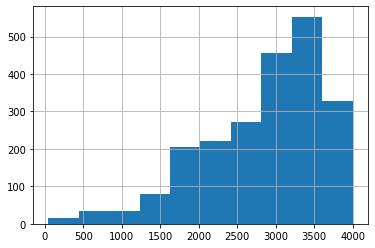

In [15]:
promoters['number_neutral_bases'].hist() 

In [16]:
# https://papermill.readthedocs.io/en/latest/usage-parameterize.html
window_size = None
window_stride = None 

In [17]:
# Parameters
window_size = 1001
window_stride = 40


In [18]:
#papermill_description=COMPUTE_ZSCORES

import numpy as np 

sys.path.append('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/predict-constraint/germline-model')

from expected_observed_counts import (
    compute_expected_observed_counts,
    filter_by_regions
)
from pack_unpack import pack
from read_model import read_model 

def filter_and_average(xs): 
    if not xs: return None 
    elif len(xs) == 0: return None
    else: return np.mean([x for x in xs if x])

model = read_model(f'/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/dist/model-germline-grch38-exclude-test-promoters.windowSize-{window_size}.json')

def compute_neutral_zscores(row): 
    region = pack(row['Chromosome'], row['Start'], row['End'])  
    expected_observed_counts = compute_expected_observed_counts(region, model, window_stride, log=False) 
    (
        window_positions_neutral_regions, 
        N_bars_neutral_regions, 
        N_observeds_neutral_regions,
        K_bars_neutral_regions,
        K_observeds_neutral_regions
    ) = filter_by_regions(
        expected_observed_counts['windows'], 
        expected_observed_counts['NBars'], 
        expected_observed_counts['NObserveds'], 
        expected_observed_counts['KBars'], 
        expected_observed_counts['KObserveds'], 
        regions=neutral_regions, 
        how='containment'
    )    
    # https://www.dataquest.io/blog/settingwithcopywarning/
    with pd.option_context('mode.chained_assignment', None):
        row['N_bar_mean_neutral'] = filter_and_average(N_bars_neutral_regions)
        row['N_observeds_mean_neutral'] = filter_and_average(N_observeds_neutral_regions)
        row['K_bar_mean_neutral'] = filter_and_average(K_bars_neutral_regions)
        row['K_observeds_mean_neutral'] = filter_and_average(K_observeds_neutral_regions)
                
    return row 

# https://stackoverflow.com/a/34365537/6674256
from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()
logging.info('Computing z-scores for promoters...')
promoters_with_zscores = promoters.progress_apply(compute_neutral_zscores, axis=1)
logging.info('...finished computing z-scores for promoters...')

promoters_with_zscores

2022-06-24 18:43:33 Computing z-scores for promoters...


  0%|          | 0/2197 [00:00<?, ?it/s]

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2022-06-24 22:20:57 ...finished computing z-scores for promoters...


,transcript_id,gene_id,gene_name,cpg_density,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,...,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts,N_bar_mean_neutral,N_observeds_mean_neutral,K_bar_mean_neutral,K_observeds_mean_neutral
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.779360,0.151475,0.617473,chr1:5990473-5994471,3999,...,chr1,5990473,5994471,0,2811,7,-2.210673,214.000000,0.517183,117.333333
1,ENST00000349533,ENSG00000116678,LEPR,0.562905,0.282,0.161820,0.034375,0.643277,chr1:65418653-65422651,3999,...,chr1,65418653,65422651,1,3395,5,-1.747065,187.785714,-1.129201,91.928571
2,ENST00000366577,ENSG00000116984,MTR,0.686405,0.582,0.424430,0.055250,0.859294,chr1:236793311-236797309,3999,...,chr1,236793311,236797309,2,3494,6,-1.194290,205.555556,0.499187,112.777778
3,ENST00000376132,ENSG00000204495,PRAMEF13,0.195202,1.892,0.000000,NaN,0.078596,chr1:13345136-13349134,3999,...,chr1,13345136,13349134,3,3608,4,0.499267,208.846154,-1.574388,97.346154
4,ENST00000375847,ENSG00000116138,DNAJC16,0.664360,0.788,0.560080,0.140700,0.855939,chr1:15524814-15528812,3999,...,chr1,15524814,15528812,4,3060,5,-1.229557,209.833333,0.249845,112.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,ENST00000266088,ENSG00000100170,SLC5A1,0.177320,0.746,0.497440,0.091225,0.830670,chr22:32041033-32045031,3999,...,chr22,32041033,32045031,2204,3841,3,-2.572807,172.294118,0.869387,98.823529
2193,ENST00000266269,ENSG00000100105,PATZ1,0.736377,0.238,0.050275,0.560725,0.952861,chr22:31344234-31348232,3999,...,chr22,31344234,31348232,2205,203,2,NaN,NaN,NaN,NaN
2194,ENST00000248958,ENSG00000128228,SDF2L1,0.565301,1.025,0.326040,0.167800,0.878299,chr22:21640262-21644260,3999,...,chr22,21640262,21644260,2206,2243,6,-4.660437,214.000000,1.054027,122.000000
2195,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.905730,0.044775,0.623305,chr22:26481878-26485876,3999,...,chr22,26481878,26485876,2207,3084,3,-4.225251,152.105263,0.847838,88.210526


In [19]:
promoters_with_zscores = promoters_with_zscores.rename(columns={'cpg_density': 'cpg_density_region_grch38'})
promoters_with_zscores

,transcript_id,gene_id,gene_name,cpg_density_region_grch38,loeuf,oe_lof_point_estimate,promoter_phastcons,exonic_phastcons,region_grch38,region_grch38_length,...,Chromosome,Start,End,promoter_id,number_neutral_bases,number_neutral_parts,N_bar_mean_neutral,N_observeds_mean_neutral,K_bar_mean_neutral,K_observeds_mean_neutral
0,ENST00000378156,ENSG00000131697,NPHP4,0.637959,0.984,0.779360,0.151475,0.617473,chr1:5990473-5994471,3999,...,chr1,5990473,5994471,0,2811,7,-2.210673,214.000000,0.517183,117.333333
1,ENST00000349533,ENSG00000116678,LEPR,0.562905,0.282,0.161820,0.034375,0.643277,chr1:65418653-65422651,3999,...,chr1,65418653,65422651,1,3395,5,-1.747065,187.785714,-1.129201,91.928571
2,ENST00000366577,ENSG00000116984,MTR,0.686405,0.582,0.424430,0.055250,0.859294,chr1:236793311-236797309,3999,...,chr1,236793311,236797309,2,3494,6,-1.194290,205.555556,0.499187,112.777778
3,ENST00000376132,ENSG00000204495,PRAMEF13,0.195202,1.892,0.000000,NaN,0.078596,chr1:13345136-13349134,3999,...,chr1,13345136,13349134,3,3608,4,0.499267,208.846154,-1.574388,97.346154
4,ENST00000375847,ENSG00000116138,DNAJC16,0.664360,0.788,0.560080,0.140700,0.855939,chr1:15524814-15528812,3999,...,chr1,15524814,15528812,4,3060,5,-1.229557,209.833333,0.249845,112.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,ENST00000266088,ENSG00000100170,SLC5A1,0.177320,0.746,0.497440,0.091225,0.830670,chr22:32041033-32045031,3999,...,chr22,32041033,32045031,2204,3841,3,-2.572807,172.294118,0.869387,98.823529
2193,ENST00000266269,ENSG00000100105,PATZ1,0.736377,0.238,0.050275,0.560725,0.952861,chr22:31344234-31348232,3999,...,chr22,31344234,31348232,2205,203,2,NaN,NaN,NaN,NaN
2194,ENST00000248958,ENSG00000128228,SDF2L1,0.565301,1.025,0.326040,0.167800,0.878299,chr22:21640262-21644260,3999,...,chr22,21640262,21644260,2206,2243,6,-4.660437,214.000000,1.054027,122.000000
2195,ENST00000215917,ENSG00000100104,SRRD,0.529636,1.492,0.905730,0.044775,0.623305,chr22:26481878-26485876,3999,...,chr22,26481878,26485876,2207,3084,3,-4.225251,152.105263,0.847838,88.210526


In [20]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
promoters_with_zscores_path = (
    f'{CONSTRAINT_TOOLS_DATA}/promoters-windowSize/grch38/'
    f'promoters-with-zscores.windowSize-{window_size}.windowStride-{window_stride}.bed'
)

promoters_with_zscores.to_csv(promoters_with_zscores_path, index=False, sep='\t')